 Call Back:
 Imagine subsetting and indexing as if it's SQL:
 
 employees[employees.hire_hiredate.str.contains("12-25"]
 

In [42]:
import pandas as pd
from pydataset import data

In [43]:
mpg = data('mpg')
mpg.head()
mpg[mpg.hwy > 35]
# SQL : select * from mpg where hwy > 35

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
106,honda,civic,1.8,2008,4,auto(l5),f,25,36,r,subcompact
107,honda,civic,1.8,2008,4,auto(l5),f,24,36,c,subcompact
197,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact
213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
222,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
223,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [44]:
#mpg[mpg.hwy > 35][[“hwy”, “model”]]
# SQL: select hwy, model from mpg where hwy > 35
mpg[["model", "hwy"]][mpg.hwy > 35]
# SQL: select hwy, model from mpg
# double brackets give you back a dataframe containing only the columns specified
#mpg.hwy
mpg[["hwy"]]

,hwy
1,29
2,29
3,31
4,30
5,26
6,26
7,27
8,26
9,25
10,28


Continue working with pandas dataframes, and explore some more complex dataframe manipulations.

In [45]:
%matplotlib inline
import numpy as  np

In [56]:
np.random.seed(123)

students = ['Sally', 'Jane', 'Suzie', 'Billy', 'Ada', 'John', 'Thomas', 'Marie', 'Albert', 'Richard', 'Isaac', 'Alan']

#randomly generate scores for each student for reach subject.
#note that all the values need to have the same length here

math_grades = np.random.randint(low = 60, high = 100, size = len(students))
english_grades = np.random.randint(low = 60, high = 100, size = len(students))
reading_grades = np.random.randint(low = 60, high = 100, size = len(students))

#Create a data frame using pd.DataFrame.

df = pd.DataFrame({'name': students,
                   'math': math_grades,
                   'english': english_grades,
                   'reading': reading_grades,
                   'classroom': np.random.choice(['A', 'B'], len(students))})
df

0     80
1     67
2     95
3     88
4     98
5     93
6     81
7     90
8     87
9     94
10    93
11    72
Name: reading, dtype: int64

# Creating Dataframes

From Lists and Dictionaries

There are several ways to create dataframes.

Dataframe from a dictionary:

In [47]:
pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

,A,B
0,1,4
1,2,5
2,3,6


Keys - will be the column names.

values - make up each column.

Create a 2d data structure, either with a numpy array or list of lists

In [48]:
pd.DataFrame([1, 2, 3], [4, 5, 6])

,0
4,1
5,2
6,3


In [49]:
data = np.array([[1, 2, 3], [4, 5, 6]])
pd.DataFrame(data, columns = ['a', 'b', 'c'])

,a,b,c
0,1,2,3
1,4,5,6


# From Text Files

Commonly used function to import data from an external text file is:

* `read_csv`

Two other commonly used functions are

* `read_table` - less structured files that are still tabular
* `read_json` - data stored as JSON

# From SQL

`read_sql` method creates a dataframe based on the results of a SQL query. We will need to tell pandas how to connect to the database we are querying. The way communicate this to pandas is with a specially formated *connection string*.

Whenever we want to connect to database from our python code (other programming languages are similar), we will need a __driver__, software that handles the details of the database connection.

In order to connect to mysql insall the `mysqlclient` and `pymysql` driver packages: `python -m pip install mysqlclient pymysql` Once those are installed, we can create the *connection string*.

In general, database connection urls will have this format:

`protocol://[user[:password]@]hostname/[database_name]`

Example:

`mysql+pymysql://codeup:p@assw0rd123.123.123.123/some_db`

We don't want to publish our database credentials on github, and we willl need access to these values in our code in order to create the connection string defined above.

We can define several variables in a file named `env.py` that contain sensitive data, add `env.py` to our `.gitignore` file, and then import those values into another script.

In [50]:
from env import host, user, password
url = f'mysql+pymysql://{user}:{password}@{host}/employees'
df = pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50',url)

Once this url is defined, we can use it with `read_sql` function to have pandas treat the results of a SQL query as a dataframe.

In [51]:
pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


Longer SQL QUERIES:

In [52]:
sql = '''
SELECT
    emp_no,
    first_name,
    last_name
FROM employees
WHERE gender = 'F'
LIMIT 5
OFFSET 200'''

pd.read_sql(sql,url)

,emp_no,first_name,last_name
0,10513,Yuichiro,Schicker
1,10519,Yonghoan,Alencar
2,10522,Marke,Cesareni
3,10524,Shigehiro,Cincotta
4,10526,Kwangho,Theuretzbacher


In [53]:
query = '''
SELECT
    t.title as title,
    d.dept_name as dept_name
FROM titles t
JOIN dept_emp USING (emp_no)
JOIN departments d USING (dept_no)
'''

employees = pd.read_sql(query,url)
employees.head()

,title,dept_name
0,Staff,Customer Service
1,Senior Staff,Customer Service
2,Staff,Customer Service
3,Senior Staff,Customer Service
4,Staff,Customer Service


# Aggregation

The `.agg` function lets us specify a way to aggregrate a series of numberical values.

In [59]:
df.reading.agg('min')

67

`.agg` is capable of providing more detailed aggregations:

In [60]:
df[['english', 'reading', 'math']].agg(['mean', 'min', 'max'])

,english,reading,math
mean,77.666667,86.5,84.833333
min,62.000000,67.0,62.000000
max,99.000000,98.0,98.000000


# Grouping

The `.groupby` method is used to create a grouped object, wich we an capply an aggregation on. For example, if we wanted to know the highest math grade from each classroom:

In [61]:
df.groupby('classroom').math.max()

classroom
A    94
B    98
Name: math, dtype: int64

We can use `.agg` to see multiple aggregations:

In [62]:
df.groupby('classroom').math.agg(['min', 'mean', 'max'])

,min,mean,max
classroom,,,
A,62,82.625,94
B,79,89.250,98


We can group by multiple columns as well.

In [73]:
(df
.assign(passing_math = df.math.apply(lambda n: 'failing' if n < 70 else 'passing'))
.groupby(['passing_math', 'classroom'])
.reading
.agg(['mean', 'count']))


mean  count
passing_math classroom                  
failing      A          87.000000      2
passing      A          87.166667      6
             B          85.250000      4

This table means there are 2 students failing math in classroom Q with an average reading grade of 87, 6 students passing math in classroom A with an average reading grade 87.16, and 4 students passing math in classroom B with an average reading grade of 85.25.

The `transform` method can be used to produce a series with the same length of the original dataframe where each value represents the aggregation from the grouped by subgroup. For example, if we wanted to know the average math grade for each classroom, and add this data back to our original datafame:

In [75]:
df.assign(avg_math_score_by_classroom=df.groupby('classroom').math.transform('mean'))

,name,math,english,reading,classroom,avg_math_score_by_classroom
0,Sally,62,85,80,A,82.625
1,Jane,88,79,67,B,89.250
2,Suzie,94,74,95,A,82.625
3,Billy,98,96,88,B,89.250
4,Ada,77,92,98,A,82.625
5,John,79,76,93,B,89.250
6,Thomas,82,64,81,A,82.625
7,Marie,93,63,90,A,82.625
8,Albert,92,62,87,A,82.625
9,Richard,69,80,94,A,82.625


In [76]:
df.groupby('classroom').reading.describe()

,count,mean,std,min,25%,50%,75%,max
classroom,,,,,,,,
A,8.0,87.125,8.887190,72.0,80.75,88.5,94.25,98.0
B,4.0,85.250,12.392874,67.0,82.75,90.5,93.00,93.0


# Merging and Joining

Pandas provides several ways to combin dataframes together. We will look at two of them

- `pd.concat` : to combine dataframes vertically, the way CONCAT would in SQL.

- `pd.merge` : to combine dataframes horizontally, the way a SQL JOIN would.

# `concat`

When concatenating dataframes vertically, we are adding more rows to an existing dataframe. In this case the dataframes we are putting together should have the same column names.

In [79]:
df1 = pd.DataFrame({'a': [1, 2, 3]})
df2 = pd.DataFrame({'a': [4, 5, 6]})
df1

,a
0,1
1,2
2,3


In [80]:
df2

,a
0,4
1,5
2,6


In [81]:
pd.concat([df1,df2])

,a
0,1
1,2
2,3
0,4
1,5
2,6


Note that the indices are preserved on the resulting dataframe, we could call the `reset_index` method if we wanted these to be sequential.

# `Merge`

Merging is like a `JOIN` in SQL. 

Example:

In [82]:
users = pd.DataFrame({'id': [1, 2, 3, 4, 5, 6],
                      'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
                      'role_id': [1, 2, 3, 4, np.nan, np.nan]
                     })

users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,4.0
4,5,jane,NaN
5,6,mike,NaN


In [83]:
roles = pd.DataFrame({'id': [1, 2, 3, 4],
                      'name': ['admin', 'author', 'reviewer', 'commenter']
                     })

roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


The `merge` function will accept the left and right dataframes, and two keyword arguments, `left_on`, and `right_on` that are used to indicate the columns that are keys that will be used to merge the dataframes together. In addition, the `how` keyword argument is used to define what type of JOIN we want to do; one of `inner`, `left`, `right`, or `outer`.

In [84]:
pd.merge(users, roles, left_on = 'role_id', right_on = 'id', how = 'left')

,id_x,name_x,role_id,id_y,name_y
0,1,bob,1.0,1.0,admin
1,2,joe,2.0,2.0,author
2,3,sally,3.0,3.0,reviewer
3,4,adam,4.0,4.0,commenter
4,5,jane,NaN,NaN,NaN
5,6,mike,NaN,NaN,NaN


By default, pandas will add a suffix of `_x` to any columns in the left dataframe that are duplicated, and `_y` to any columns in the right dataframe taht are duplicated. We can customize this behavior with the `suffixes` keyword argument, or we can simply rename the columns before the merge:

In [85]:
pd.merge(
    users.rename(columns = {'id': 'user_id', 'name': 'username'}),
    roles.rename(columns = {'name': 'role_name'}),
    left_on = 'role_id', right_on = 'id', how = 'left')

,user_id,username,role_id,id,role_name
0,1,bob,1.0,1.0,admin
1,2,joe,2.0,2.0,author
2,3,sally,3.0,3.0,reviewer
3,4,adam,4.0,4.0,commenter
4,5,jane,NaN,NaN,NaN
5,6,mike,NaN,NaN,NaN


# Reshaping

Summarizing our data by different subgroups

- `pd.crosstab`
- `.pivot_table`

`crosstab` example: Count the number of students passing math in each classroom.

Create a column taht contains either `passing` or `failing` depending on the student's math grade:

In [87]:
df['passing_math'] = df.math.apply(lambda n: 'passing' if n >= 70 else 'failing')
df.passing_math

0     failing
1     passing
2     passing
3     passing
4     passing
5     passing
6     passing
7     passing
8     passing
9     failing
10    passing
11    passing
Name: passing_math, dtype: object

Use the `pd.crosstab` function to count the number of occurances of each subgroup (i.e. each unique combination of classroom and whether or not the students is passing):

In [88]:
pd.crosstab(df.passing_math,df.classroom)

classroom,A,B
passing_math,,
failing,2,0
passing,6,4


`crosstab` function will let us view the numbers as a percentage of total as well, with the normalize keyword argument:

In [89]:
pd.crosstab(df.passing_math,df.classroom, normalize = True)

classroom,A,B
passing_math,,
failing,0.166667,0.000000
passing,0.500000,0.333333


We can also view subtotals with the `margins` keyword argument.

In [90]:
pd.crosstab(df.passing_math,df.classroom, margins = True)

classroom,A,B,All
passing_math,,,
failing,2,0,2
passing,6,4,10
All,8,4,12


For an example using the `pivot_table` method, we'll calculate the average math grade for the combination of classroom and whether each student is passing or failing math.

In [91]:
df.pivot_table(values = 'math', index = 'classroom', columns = 'passing_math', aggfunc = 'mean')

passing_math,failing,passing
classroom,,
A,65.5,88.333333
B,NaN,89.250000


here we use the `.pivot_table` method to create our summary. This method produces output similar to an excel pivot table. We must supply 3 things here:

- the values we are aggregating (`math`)
- which values will make up the rows (the `index`, example: `index = ``classroom`)
- which values will make up the columns (`columns = ``passing_math`)
- an aggregation method (`aggfunc`); if ommitted then `mean` will be used by default.

Note that for the `values`, `index`, and `columns`, we could also supply a list of column names.

# Another Example

Create a dataframe that represents various orders at a restaurant.

In [95]:
n = 40

orders = pd.DataFrame({
    'drink': np.random.choice(['Tea', 'Water', 'Water'], n),
    'meal': np.random.choice(['Curry', 'Yakisoba Noodle', 'Pad Thai'], n)
    
})

prices = {
    'Yakisoba Noodle' : 9,
    'Curry' : 11,
    'Pad Thai': 10,
    'Tea': 2,
    'Water': 0,
}

# The .map method lets us use the above dictionary to calculate the total price of an order.

orders['bill'] = orders.drink.map(prices) +orders.meal.map(prices)

orders.tail()




,drink,meal,bill
35,Water,Pad Thai,10
36,Water,Pad Thai,10
37,Tea,Pad Thai,12
38,Tea,Pad Thai,12
39,Water,Curry,11


How many orders have each combination of meal and drink

In [97]:
pd.crosstab(orders.drink, orders.meal)

meal,Curry,Pad Thai,Yakisoba Noodle
drink,,,
Tea,1,4,3
Water,7,15,10


In [98]:
pd.crosstab(orders.drink, orders.meal, normalize = True, margins = True)

meal,Curry,Pad Thai,Yakisoba Noodle,All
drink,,,,
Tea,0.025,0.100,0.075,0.2
Water,0.175,0.375,0.250,0.8
All,0.200,0.475,0.325,1.0


bill amount for each combination:

In [99]:
orders.pivot_table('bill', 'drink', 'meal')

meal,Curry,Pad Thai,Yakisoba Noodle
drink,,,
Tea,13,12,11
Water,11,10,9


We could find the same information with a multi-level group by:

In [100]:
orders.groupby(['drink', 'meal']).bill.mean()

drink  meal           
Tea    Curry              13
       Pad Thai           12
       Yakisoba Noodle    11
Water  Curry              11
       Pad Thai           10
       Yakisoba Noodle     9
Name: bill, dtype: int64

# More Dataframe Features

## Indicies

A dataframes *index* is a way to label each row.

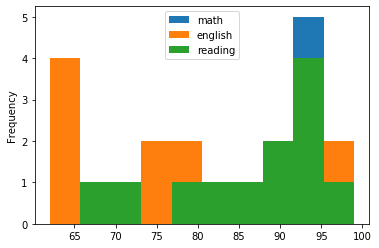

In [101]:
df.set_index('classroom').plot.hist()

## `.pipe`

The .pipe method allows chains of functions that accept and return dataframes to be applied to a dataframe, and extra arguments to thos functions to be specified.

In [103]:
def calculate_avg_grade(df):
    avg = (df.math + df.english + df.reading) / 3
    return df.assign(average_grade = avg)

df.pipe(calculate_avg_grade)

,name,math,english,reading,classroom,passing_math,average_grade
0,Sally,62,85,80,A,failing,75.666667
1,Jane,88,79,67,B,passing,78.000000
2,Suzie,94,74,95,A,passing,87.666667
3,Billy,98,96,88,B,passing,94.000000
4,Ada,77,92,98,A,passing,89.000000
5,John,79,76,93,B,passing,82.666667
6,Thomas,82,64,81,A,passing,75.666667
7,Marie,93,63,90,A,passing,82.000000
8,Albert,92,62,87,A,passing,80.333333
9,Richard,69,80,94,A,failing,81.000000


## `.loc` and `.iloc`

We can use `.iloc` to subset rows or columns using a numerical index. For example, to select the first 3 rows:

In [104]:
df.iloc[:3]

,name,math,english,reading,classroom,passing_math
0,Sally,62,85,80,A,failing
1,Jane,88,79,67,B,passing
2,Suzie,94,74,95,A,passing


We can also specify which columns we want to select:

In [105]:
df.iloc[:3, 1:3]

,math,english
0,62,85
1,88,79
2,94,74


Similarly `.loc` let's us obtain values by a named index.

In [107]:
df.loc[:, 'math':'reading'] #select all rows, and columns from 'math' to 'reading'

,math,english,reading
0,62,85,80
1,88,79,67
2,94,74,95
3,98,96,88
4,77,92,98
5,79,76,93
6,82,64,81
7,93,63,90
8,92,62,87
9,69,80,94


# Transposing

In [108]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11
name,Sally,Jane,Suzie,Billy,Ada,John,Thomas,Marie,Albert,Richard,Isaac,Alan
math,62,88,94,98,77,79,82,93,92,69,92,92
english,85,79,74,96,92,76,64,63,62,80,99,62
reading,80,67,95,88,98,93,81,90,87,94,93,72
classroom,A,B,A,B,A,B,A,A,A,A,B,A
passing_math,failing,passing,passing,passing,passing,passing,passing,passing,passing,failing,passing,passing
